In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Regresión Lineal:**

In [7]:
# Leer el archivo CSV
data = pd.read_csv('dataset_modificado.csv')

# Revisar las primeras filas del dataset
data.head()

,Nombre del equipo,Partidos jugados,Goles anotados,Goles recibidos,Partidos Ganados,Partidos Perdidos,Partidos Empatados,Tiros al arco,Valores de la plantilla (M),Edad Promedio,Prestigio,Posicion apertura
0,Universitario,17,32,7,12,1,4,145,13.18,27.2,5,1
1,Sporting Cristal,17,44,20,13,3,1,132,14.63,25.3,5,2
2,Melgar,17,36,19,12,3,2,158,10.89,26.4,4,3
3,Alianza Lima,17,32,16,11,6,0,124,14.15,25.9,5,4
4,Cusco FC,17,22,21,9,6,2,113,7.15,26.1,3,5


In [65]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['Partidos jugados', 'Goles recibidos', 'Partidos Perdidos',
          'Partidos Empatados', 'Tiros al arco', 'Valores de la plantilla (M)', 'Edad Promedio', 'Prestigio']]
y = data['Partidos Ganados']  # Ahora predecimos directamente la cantidad de partidos ganados

In [66]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Crear y entrenar el modelo de regresión lineal
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [68]:
# Hacer predicciones en el conjunto de prueba
y_pred = linear_regression_model.predict(X_test)

In [69]:
# Calcular el error cuadrático medio (MSE) y R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Cuadrático Medio (MSE): 8.961459883310694e-28
Coeficiente de Determinación (R²): 1.0


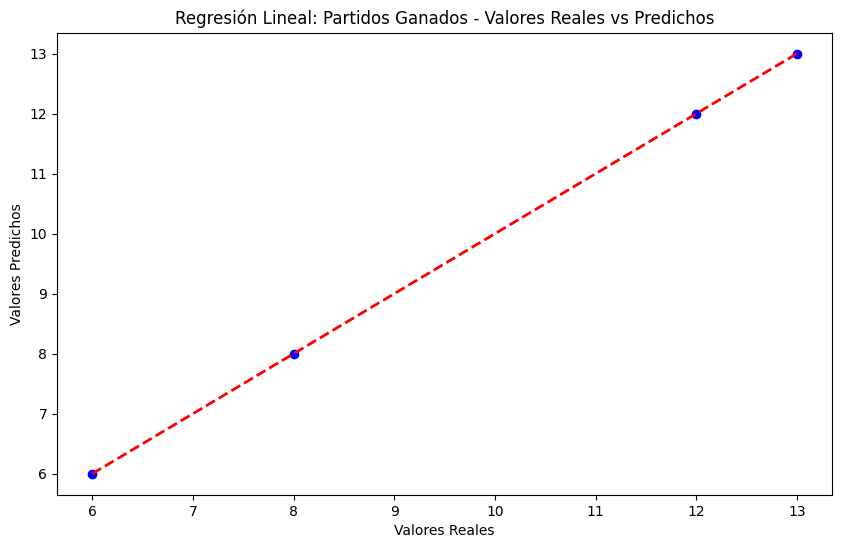

In [70]:
# Graficar los valores reales vs los predichos
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal: Partidos Ganados - Valores Reales vs Predichos')
plt.show()

**Regresion Logistica**

In [81]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [82]:
# Leer el archivo CSV
data = pd.read_csv('dataset_modificado.csv')

# Revisar las primeras filas del dataset
data.head()

,Nombre del equipo,Partidos jugados,Goles anotados,Goles recibidos,Partidos Ganados,Partidos Perdidos,Partidos Empatados,Tiros al arco,Valores de la plantilla (M),Edad Promedio,Prestigio,Posicion apertura
0,Universitario,17,32,7,12,1,4,145,13.18,27.2,5,1
1,Sporting Cristal,17,44,20,13,3,1,132,14.63,25.3,5,2
2,Melgar,17,36,19,12,3,2,158,10.89,26.4,4,3
3,Alianza Lima,17,32,16,11,6,0,124,14.15,25.9,5,4
4,Cusco FC,17,22,21,9,6,2,113,7.15,26.1,3,5


In [83]:
# Convertir 'Partidos Ganados' en una variable binaria usando la media como umbral
threshold = data['Partidos Ganados'].mean()
data['Ganador_binario'] = np.where(data['Partidos Ganados'] > threshold, 1, 0)

# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['Partidos jugados', 'Goles recibidos', 'Partidos Perdidos',
          'Partidos Empatados', 'Tiros al arco', 'Valores de la plantilla (M)', 'Edad Promedio', 'Prestigio']]
y = data['Ganador_binario']

In [84]:
# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [85]:
# Crear y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
# Hacer predicciones en el conjunto de prueba
y_pred = logistic_regression_model.predict(X_test)

In [87]:
# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy}")

# Mostrar el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Exactitud: 1.0
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



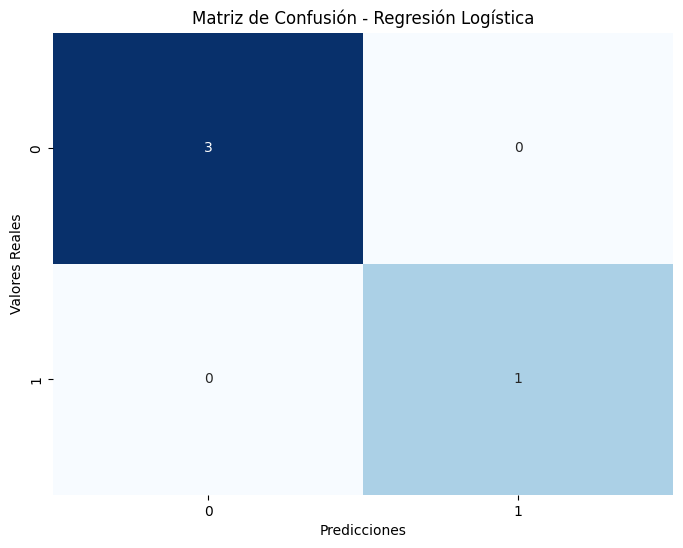

In [88]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

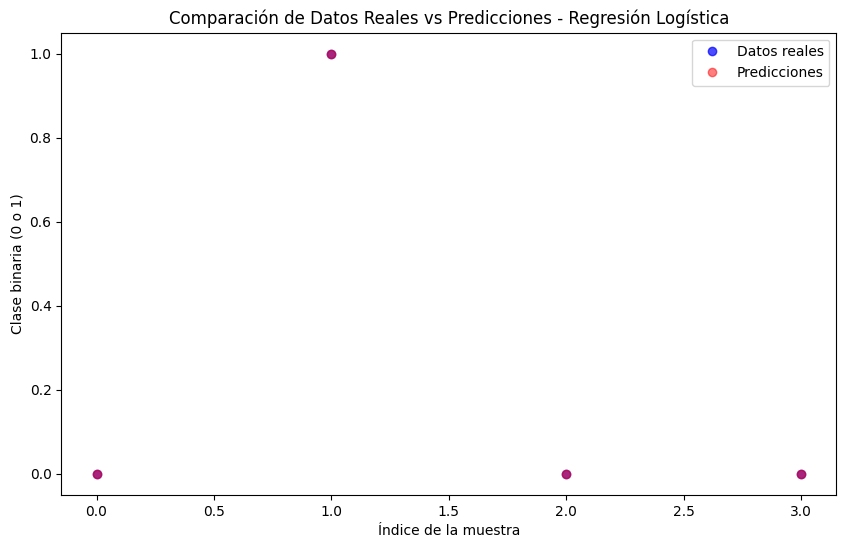

In [89]:
# Visualizar los resultados para la regresión logística
plt.figure(figsize=(10,6))

# Graficar los puntos de los valores reales y las predicciones
plt.plot(y_test.values, 'bo', label='Datos reales', alpha=0.7)
plt.plot(y_pred, 'ro', label='Predicciones', alpha=0.5)

# Etiquetas y leyenda
plt.xlabel("Índice de la muestra")
plt.ylabel("Clase binaria (0 o 1)")
plt.legend()
plt.title("Comparación de Datos Reales vs Predicciones - Regresión Logística")
plt.show()

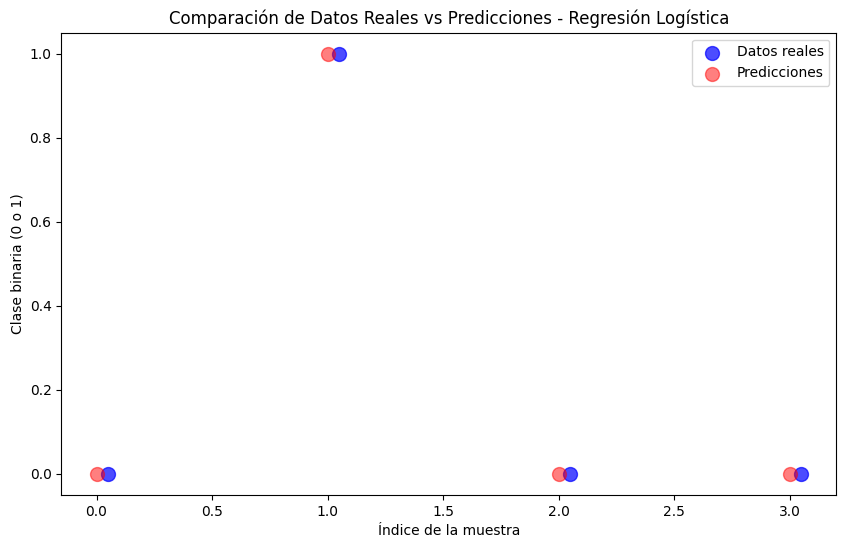

In [90]:
# Visualizar los resultados para la regresión logística
plt.figure(figsize=(10,6))

# Agregar un pequeño jitter a los puntos para que no se superpongan
jitter = 0.05

# Graficar los puntos de los valores reales con jitter
plt.scatter(np.arange(len(y_test)) + jitter, y_test, color='blue', label='Datos reales', alpha=0.7, s=100)

# Graficar los puntos de las predicciones con jitter
plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='Predicciones', alpha=0.5, s=100)

# Etiquetas y leyenda
plt.xlabel("Índice de la muestra")
plt.ylabel("Clase binaria (0 o 1)")
plt.legend()
plt.title("Comparación de Datos Reales vs Predicciones - Regresión Logística")
plt.show()

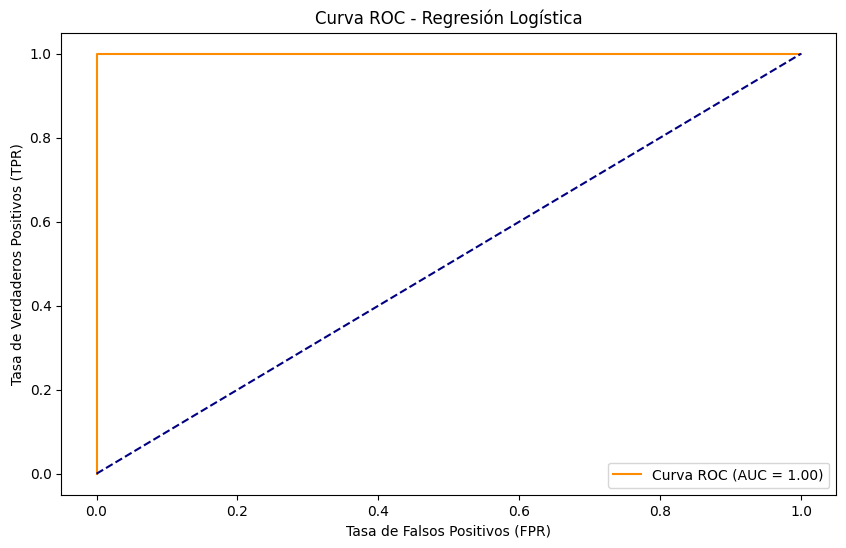

In [91]:
# Curva ROC
y_prob = logistic_regression_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

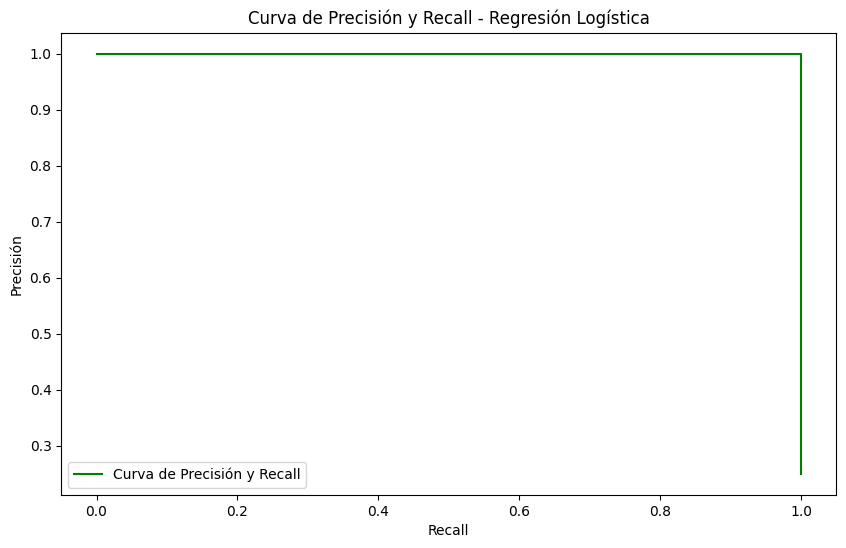

In [92]:
from sklearn.metrics import precision_recall_curve

# Calcular la curva de precisión y recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Graficar la curva de precisión y recall
plt.figure(figsize=(10,6))
plt.plot(recall, precision, label='Curva de Precisión y Recall', color='green')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva de Precisión y Recall - Regresión Logística')
plt.legend(loc="lower left")
plt.show()

**Arbol de Decision**



In [46]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [47]:
# Leer el archivo CSV
data = pd.read_csv('dataset_modificado.csv')

# Revisar las primeras filas del dataset
data.head()

,Nombre del equipo,Partidos jugados,Goles anotados,Goles recibidos,Partidos Ganados,Partidos Perdidos,Partidos Empatados,Tiros al arco,Valores de la plantilla (M),Edad Promedio,Prestigio,Posicion apertura
0,Universitario,17,32,7,12,1,4,145,13.18,27.2,5,1
1,Sporting Cristal,17,44,20,13,3,1,132,14.63,25.3,5,2
2,Melgar,17,36,19,12,3,2,158,10.89,26.4,4,3
3,Alianza Lima,17,32,16,11,6,0,124,14.15,25.9,5,4
4,Cusco FC,17,22,21,9,6,2,113,7.15,26.1,3,5


In [48]:
# Convertir 'Partidos Ganados' en una variable binaria usando la media como umbral
threshold = data['Partidos Ganados'].mean()  # Usar la media de los partidos ganados
data['Ganador_binario'] = np.where(data['Partidos Ganados'] > threshold, 1, 0)

# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['Partidos jugados', 'Goles recibidos', 'Partidos Perdidos',
          'Partidos Empatados', 'Tiros al arco', 'Valores de la plantilla (M)', 'Edad Promedio', 'Prestigio']]
y = data['Ganador_binario']

In [49]:
# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
# Crear y entrenar el modelo de árbol de decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Exactitud: 0.75
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



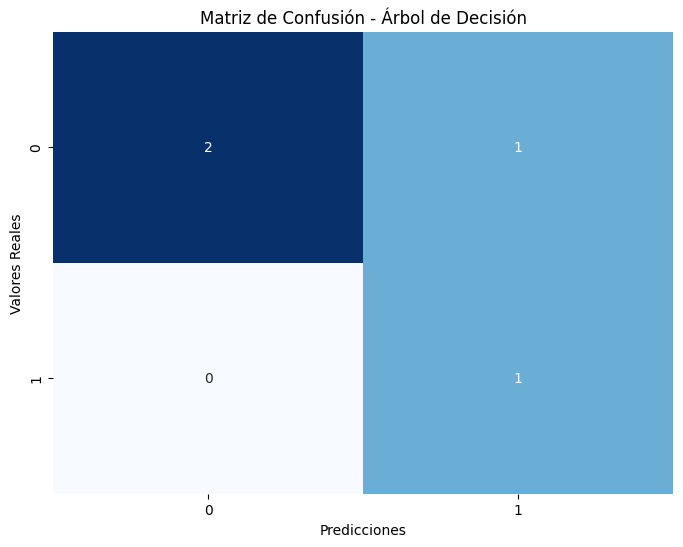

In [52]:
# Hacer predicciones en el conjunto de prueba
y_pred = decision_tree_model.predict(X_test)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy}")

# Mostrar el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

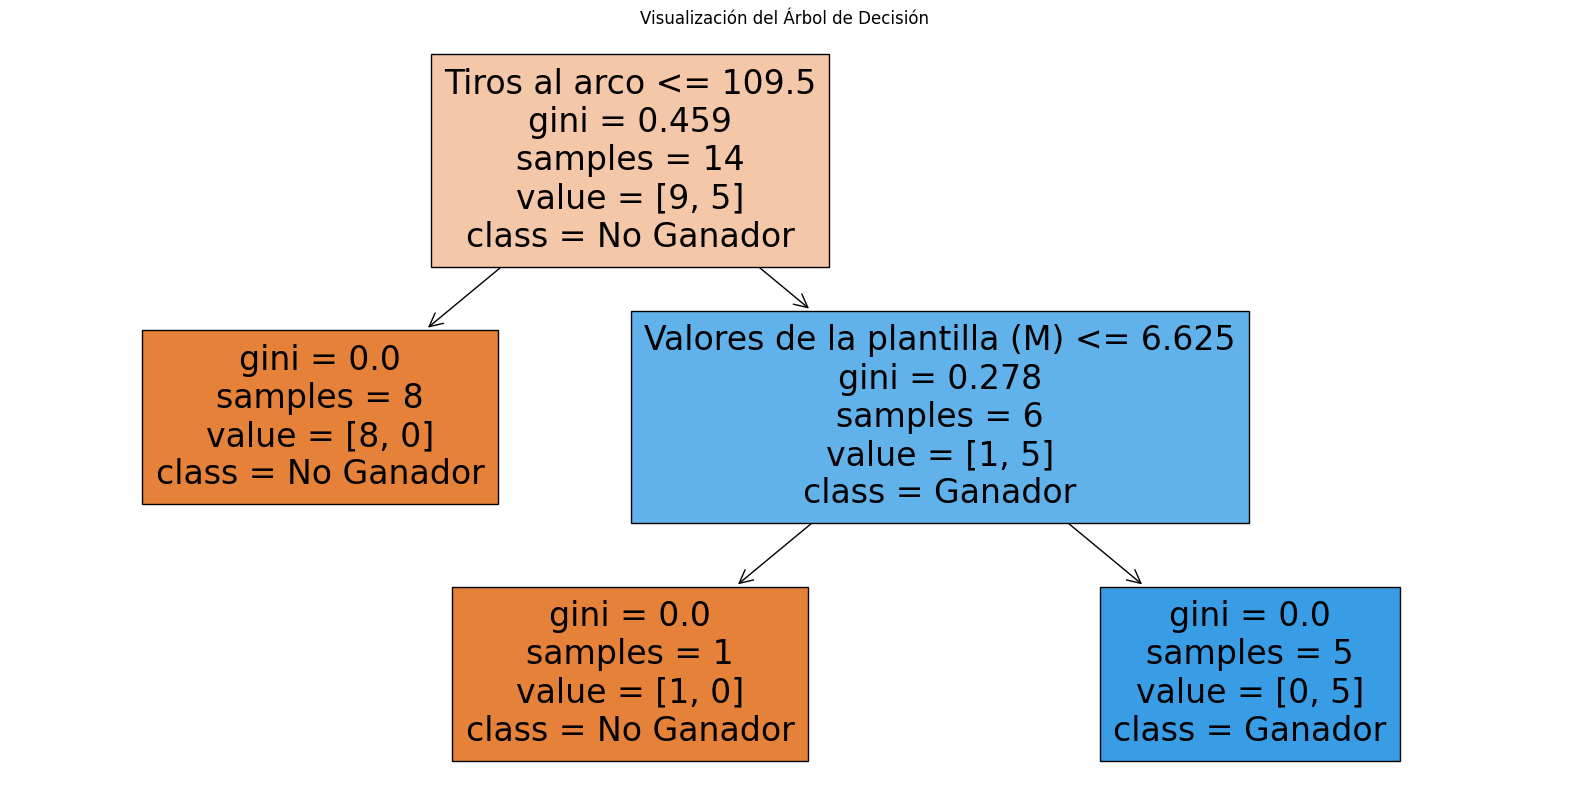

In [53]:
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['No Ganador', 'Ganador'], filled=True)
plt.title("Visualización del Árbol de Decisión")
plt.show()

**Comparacion de Modelos**

In [93]:
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix

# Definir una función para evaluar el modelo de clasificación
def evaluar_clasificacion(y_test, y_pred, y_prob=None):
    exactitud = accuracy_score(y_test, y_pred)
    matriz_conf = confusion_matrix(y_test, y_pred)

    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None

    return {
        'exactitud': exactitud,
        'auc': auc,
        'matriz_confusion': matriz_conf
    }

# Definir una función para evaluar el modelo de regresión
def evaluar_regresion(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        'mse': mse,
        'r2': r2
    }

In [94]:
# Hacer predicciones para la regresión lineal
y_pred_lineal = linear_regression_model.predict(X_test)

# Evaluar la regresión lineal
resultado_lineal = evaluar_regresion(y_test, y_pred_lineal)

print(f"Evaluación Regresión Lineal:\n{resultado_lineal}\n")

Evaluación Regresión Lineal:
{'mse': 44.49999999999981, 'r2': -236.33333333333232}



In [95]:
# Evaluar la regresión logística
y_prob_logistica = logistic_regression_model.predict_proba(X_test)[:, 1]
resultado_logistica = evaluar_clasificacion(y_test, y_pred, y_prob_logistica)

print(f"Evaluación Regresión Logística:\n{resultado_logistica}\n")

Evaluación Regresión Logística:
{'exactitud': 1.0, 'auc': 1.0, 'matriz_confusion': array([[3, 0],
       [0, 1]])}



In [96]:
# Hacer predicciones para el árbol de decisión
y_pred_arbol = decision_tree_model.predict(X_test)
y_prob_arbol = decision_tree_model.predict_proba(X_test)[:, 1]  # Solo si hay probabilidades de clase

# Evaluar el árbol de decisión
resultado_arbol = evaluar_clasificacion(y_test, y_pred_arbol, y_prob_arbol)

print(f"Evaluación Árbol de Decisión:\n{resultado_arbol}\n")

Evaluación Árbol de Decisión:
{'exactitud': 0.75, 'auc': 0.8333333333333334, 'matriz_confusion': array([[2, 1],
       [0, 1]])}



In [97]:
import pandas as pd

# Crear un DataFrame para comparar los resultados
comparacion = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Regresión Lineal'],
    'Exactitud': [resultado_logistica['exactitud'], resultado_arbol['exactitud'], None],  # No hay exactitud para regresión lineal
    'AUC': [resultado_logistica['auc'], resultado_arbol['auc'], None],  # No hay AUC para regresión lineal
    'MSE': [None, None, resultado_lineal['mse']],  # Solo para regresión lineal
    'R2': [None, None, resultado_lineal['r2']]  # Solo para regresión lineal
})

print(comparacion)

                Modelo  Exactitud       AUC   MSE          R2
0  Regresión Logística       1.00  1.000000   NaN         NaN
1    Árbol de Decisión       0.75  0.833333   NaN         NaN
2     Regresión Lineal        NaN       NaN  44.5 -236.333333


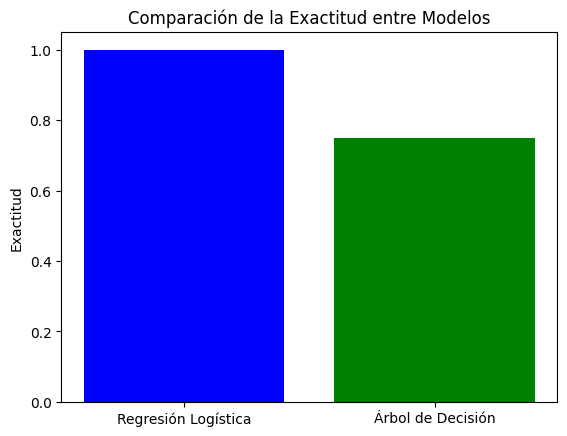

In [98]:
# Visualización de las métricas comparativas
import matplotlib.pyplot as plt

# Comparación de exactitud
modelos = ['Regresión Logística', 'Árbol de Decisión']
exactitudes = [resultado_logistica['exactitud'], resultado_arbol['exactitud']]

plt.bar(modelos, exactitudes, color=['blue', 'green'])
plt.ylabel('Exactitud')
plt.title('Comparación de la Exactitud entre Modelos')
plt.show()
